In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from esda.moran import Moran
from esda.geary import Geary
from esda.getisord import G, G_Local
from pysal.lib import weights
from splot.esda import moran_scatterplot
from libpysal.weights import DistanceBand
from libpysal.weights import KNN

Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski
- Projekt 2 z przedmiotu Ekonometrii Przestrzennej

In [57]:
woj = pd.read_csv("przestepstwa.csv")
pow = pd.read_csv("przestepstwa_pow.csv")
#woj_map = "wojewodztwa.shp"
pow_map = "powiaty.shp"
#woj_m = gpd.read_file(woj_map)
pow_m = gpd.read_file(pow_map)

In [58]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [59]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [60]:
woj.describe()

,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [61]:
woj.dtypes

JPT_NAZWA_                                                                                                                                                 object
Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem    float64
dtype: object

In [62]:
pow

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem
0,7,11212210000,nowosądecki,1549.0,2020,1210,powiat,12,małopolskie,11958.0
1,2,11212416000,tarnowski,1412.0,2020,1216,powiat,12,małopolskie,2860.0
2,5,20811301000,gorzowski,1214.0,2020,801,powiat,8,lubuskie,1108.0
3,40,23015810000,koniński,1578.0,2020,3010,powiat,30,wielkopolskie,1163.0
4,13,23016121000,poznański,1900.0,2020,3021,powiat,30,wielkopolskie,5260.0
...,...,...,...,...,...,...,...,...,...,...
375,39,71427126000,siedlecki,1603.0,2020,1426,powiat,14,mazowieckie,766.0
376,377,71427129000,sokołowski,1131.0,2020,1429,powiat,14,mazowieckie,919.0
377,378,71427133000,węgrowski,1221.0,2020,1433,powiat,14,mazowieckie,807.0
378,379,71427328000,sochaczewski,735.0,2020,1428,powiat,14,mazowieckie,1419.0


In [63]:
pow.drop(['oid', 'kod KTS', 'Województwo', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow

,JPT_NAZWA_,Przestępstwa_powiaty
0,nowosądecki,11958.0
1,tarnowski,2860.0
2,gorzowski,1108.0
3,koniński,1163.0
4,poznański,5260.0
...,...,...
375,siedlecki,766.0
376,sokołowski,919.0
377,węgrowski,807.0
378,sochaczewski,1419.0


In [64]:
pow.describe()

,Przestępstwa_powiaty
count,380.000000
mean,2014.231579
std,3182.327268
min,239.000000
25%,839.500000
50%,1271.500000
75%,2014.500000
max,45754.000000


<Axes: >

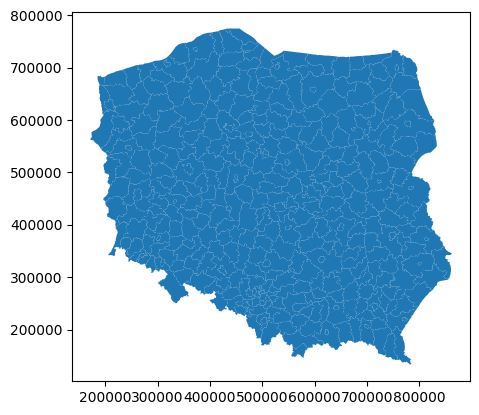

In [65]:
pow_m.plot(legend=True)

In [66]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [67]:
pow_m['JPT_NAZWA_'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [68]:
file_path = 'ludnosc.csv'


df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() 


ludnosc_pow = pd.DataFrame({
    'JPT_NAZWA_': df['Powiaty'],
    'Ludnosc_powiaty': df['Ludnosc']
})


print(ludnosc_pow)

            JPT_NAZWA_  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [69]:
print(pow)

       JPT_NAZWA_  Przestępstwa_powiaty
0     nowosądecki               11958.0
1       tarnowski                2860.0
2       gorzowski                1108.0
3        koniński                1163.0
4       poznański                5260.0
..            ...                   ...
375     siedlecki                 766.0
376    sokołowski                 919.0
377     węgrowski                 807.0
378  sochaczewski                1419.0
379   żyrardowski                1603.0

[380 rows x 2 columns]


In [70]:
pow['JPT_NAZWA_'] = pow['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [71]:
merged_df = pow.merge(ludnosc_pow, on='JPT_NAZWA_')

In [72]:
merged_df['Przestępstwa_średnia_powiaty'] = (merged_df['Przestępstwa_powiaty'] / merged_df['Ludnosc_powiaty'])

In [73]:
print(merged_df[['JPT_NAZWA_', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

       JPT_NAZWA_  Przestępstwa_powiaty  Ludnosc_powiaty  \
0     nowosądecki               11958.0           216796   
1       tarnowski                2860.0           201497   
2       gorzowski                1108.0            71836   
3        koniński                1163.0           130053   
4       poznański                5260.0           399272   
..            ...                   ...              ...   
395     siedlecki                 766.0            81362   
396    sokołowski                 919.0            53804   
397     węgrowski                 807.0            65822   
398  sochaczewski                1419.0            85045   
399   żyrardowski                1603.0            75749   

     Przestępstwa_średnia_powiaty  
0                        0.055158  
1                        0.014194  
2                        0.015424  
3                        0.008943  
4                        0.013174  
..                            ...  
395                      0.

In [74]:
pow = merged_df[['JPT_NAZWA_', 'Przestępstwa_średnia_powiaty']]
print(pow)

       JPT_NAZWA_  Przestępstwa_średnia_powiaty
0     nowosądecki                      0.055158
1       tarnowski                      0.014194
2       gorzowski                      0.015424
3        koniński                      0.008943
4       poznański                      0.013174
..            ...                           ...
395     siedlecki                      0.009415
396    sokołowski                      0.017081
397     węgrowski                      0.012260
398  sochaczewski                      0.016685
399   żyrardowski                      0.021162

[400 rows x 2 columns]


In [75]:
print(pow.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

          JPT_NAZWA_  Przestępstwa_średnia_powiaty
42            Krosno                      0.182498
15   Piekary Śląskie                      0.150790
37       Ruda Śląska                      0.091868
229          gdański                      0.055558
0        nowosądecki                      0.055158
..               ...                           ...
332        przemyski                      0.007183
338      strzyżowski                      0.006646
320          opolski                      0.006401
313        świdnicki                      0.004964
348          bielski                      0.003832

[400 rows x 2 columns]


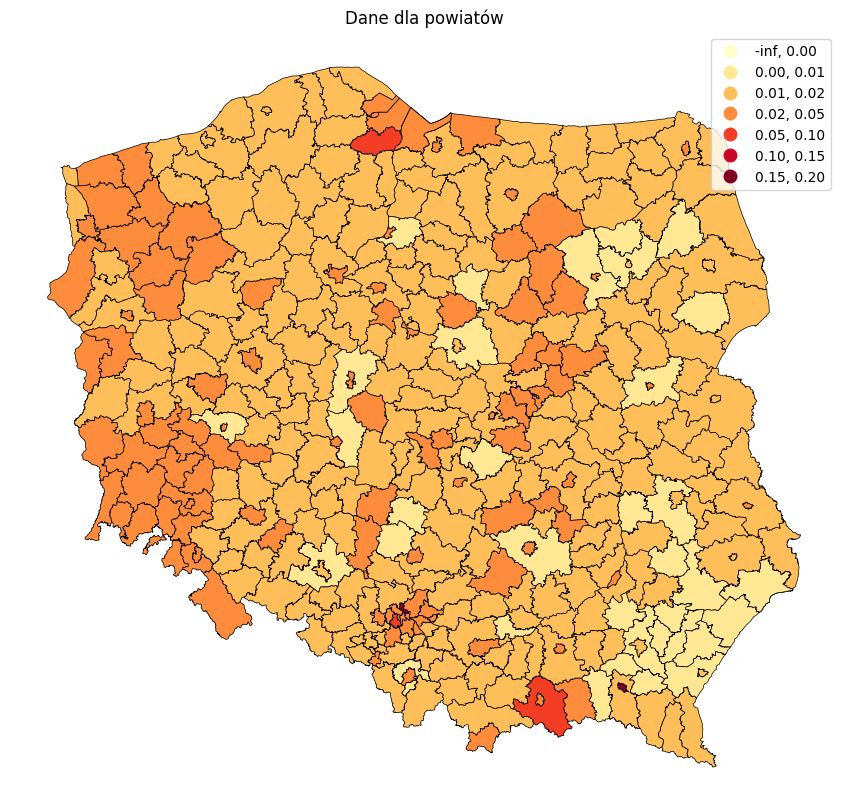

In [76]:
merged_pow = pow_m.merge(pow, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow['Kategoria'] = np.digitize(
    merged_pow['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów')
plt.show()

In [77]:
#Analizy przy użyciu wag binarnego sąsiedztwa

In [78]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow)
w.transform = 'r'

C:\Users\xjulc\AppData\Local\Temp\ipykernel_22268\401519068.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow)


('WARNING: ', 254, ' is an island (no neighbors)')


c:\Python310\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 254.
  W.__init__(self, neighbors, ids=ids, **kw)


In [79]:
y = merged_pow[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: 0.09657896342641319
E(I): -0.00228310502283105
Var(I): 0.0008340830568668548
Z(I): 3.423143009567179
p-value: 0.0006190150114729597


In [80]:
geary_pow = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)         

Geary's C: 0.8083744371413427
E(C): 1.0
Var(C): 0.0011348124581800488
Z(C): -5.688416612280592
p-value: 6.411134867236472e-09


In [81]:
g_pow = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)              

G: 0.014666884462192097
E(G): 0.015342049697839632
Var(G): 2.4216084391163735e-07
Z(G): -1.3720126373469819
p-value: 0.08502975189135054


In [82]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

c:\Python310\lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)


Local G* values: [ 1.06521565e+00  1.19051065e+00  1.12158673e+00  1.21858534e+00
  1.71063419e-01  6.48100462e-02 -2.82822446e-01 -1.75424779e-01
 -1.09378469e-01 -2.65889905e-01 -5.69253367e-02 -1.35745100e-02
 -9.28120828e-03  2.14579445e-01 -3.60020387e-01  1.19786036e-01
  7.60267848e-01  1.06264510e-01  2.31703636e-01  1.62984813e-01
  2.59500713e-01 -3.12814151e-01  9.29563571e-03 -1.34565892e-01
 -2.51894079e-01 -5.51894694e-01 -3.85926147e-01  4.85992725e-02
 -8.90457260e-01 -3.05195689e-01 -3.69085337e-01  1.74821434e-01
 -2.26947690e-02 -1.23606095e-01 -1.79967691e-01 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -2.60469237e-01
  6.18359334e-02  3.20917754e+00 -2.19620944e-01  2.68027364e+00
  5.61504096e-01  1.60897742e-01 -2.30399167e-02  4.98607541e-01
 -2.81565505e-01 -2.29322744e-01 -3.10859651e-01 -1.30756034e-01
 -2.32288989e-01 -5.96360375e-01 -1.30634245e-01 -1.47405769e-01
  2.33781455e-01 -7.58831711e-01 -4.44366655e-01 -8.76847236e-01
 -2.7552

c:\Python310\lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


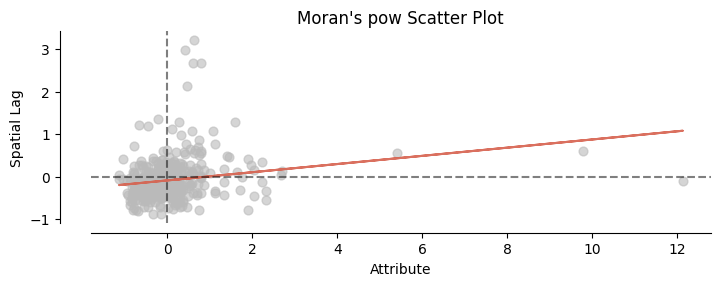

In [84]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

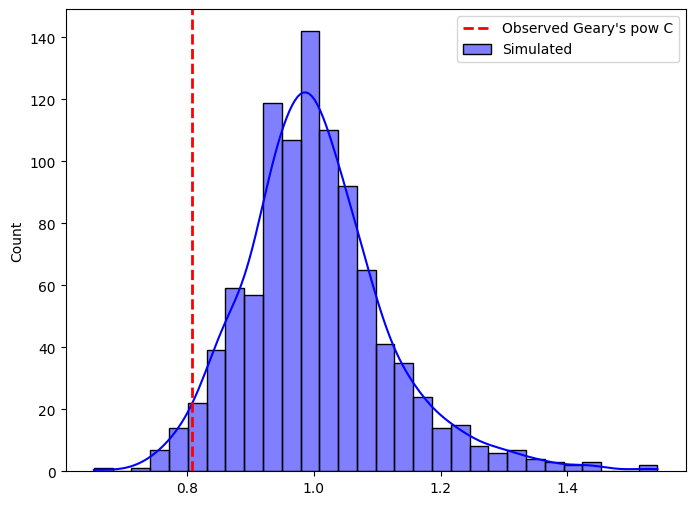

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

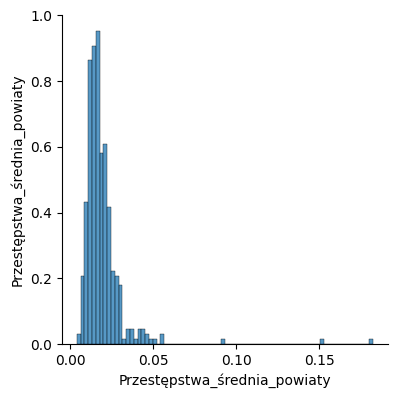

In [86]:
sns.pairplot(pow, height=4)  
plt.show()


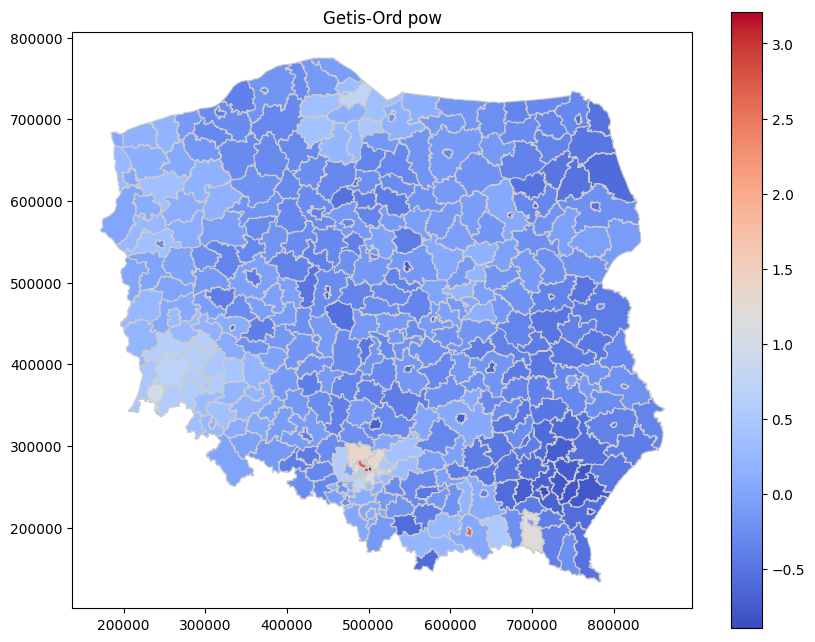

In [87]:
merged_pow['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

#Analizy przy użyciu wag KNN

In [88]:
data_column = 'Przestępstwa_średnia_powiaty'

w_knn = KNN.from_dataframe(merged_pow)

c:\Python310\lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [89]:
y_knn = merged_pow[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm)       

Moran's I: 0.0649186086234553
E(I): -0.00228310502283105
Var(I): 0.0018529602287949939
Z(I): 1.5611595812311598
p-value: 0.11848610298736469


In [90]:
geary_pow_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)        
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm)        

Geary's C: 1.1162783263412597
E(C): 1.0
Var(C): 0.002292061628420925
Z(C): 2.428765732389791
p-value: 0.007575159089658151


In [91]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)             

G: 0.004979931695802312
E(G): 0.0045662100456621
Var(G): 1.6952665054131052e-08
Z(G): 3.177527058348277
p-value: 0.0007426841447580879


In [92]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [-2.78748232e-01  3.43067074e-01 -4.84427695e-02  3.42650499e-01
  4.17206952e-01  9.98466229e-01 -2.42201834e-01 -1.17076438e-01
 -1.42021979e-01 -6.07739414e-01  2.72350045e-01  2.36336233e-01
 -7.80854729e-02 -2.87878391e-01 -4.65538725e-01  1.52451798e-02
  1.03201700e+00 -2.78748232e-01 -4.97309749e-02 -4.84427695e-02
  3.42650499e-01 -5.48337355e-01 -5.60676621e-02 -1.42491183e-01
 -2.08467041e-01 -6.90541605e-01 -6.98314503e-01  6.05276140e-01
 -8.16069825e-01 -2.66394039e-01 -3.99100596e-01  5.32735167e-02
 -1.69785528e-01  5.25967060e-01 -1.15001826e-02 -8.46233898e-01
  8.84294308e-01  5.91901188e-01  8.83413404e-01  1.28351110e-01
  4.42914257e-01  5.08570756e+00  1.00563166e+00  5.11597496e+00
  1.11989156e+00  4.76850074e-01 -2.78128595e-01  5.95306768e-01
 -9.86500856e-02  3.35520354e-02 -4.01173368e-01  9.74200683e-03
  6.25826372e+00 -2.24537737e-01 -3.97800095e-02 -6.64162808e-02
 -1.35377653e-01 -4.48993899e-01 -3.10553772e-01 -8.39560732e-01
 -3.3149

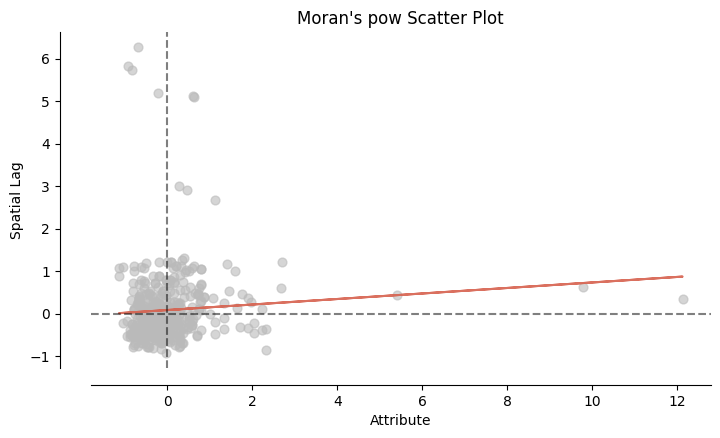

In [95]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

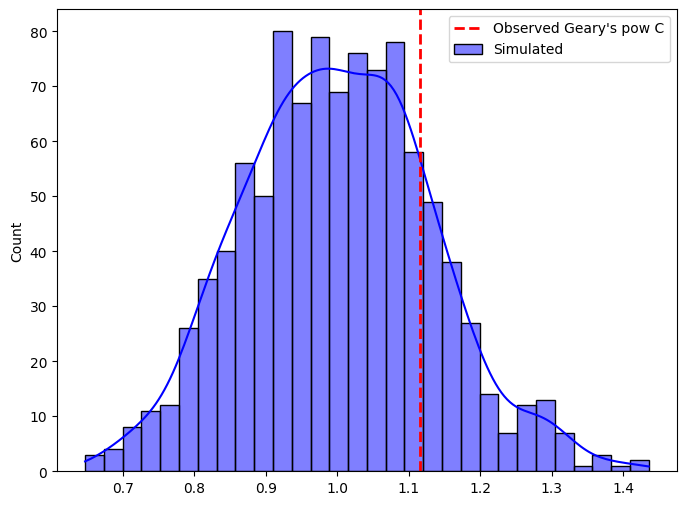

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

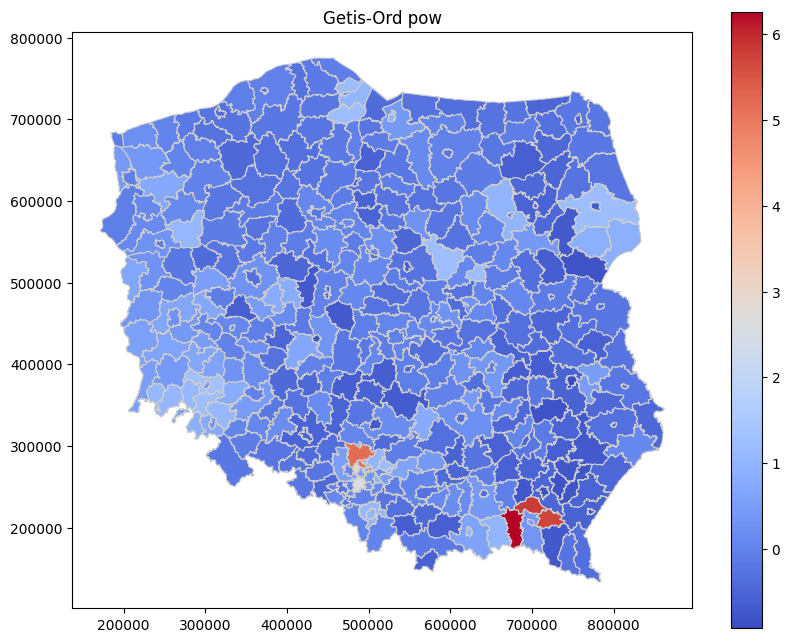

In [97]:
merged_pow['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

#Analizy przy użyciu wag KNN z testami permutacyjnymi

In [98]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=5) 
moran_pow_knn_perm = Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_knn_perm.I)
print("E(I):", moran_pow_knn_perm.EI)
print("Var(I):", moran_pow_knn_perm.VI_norm)
print("Z(I):", moran_pow_knn_perm.z_norm)
print("p-value:", moran_pow_knn_perm.p_norm)      

Moran's I (z permutacjami): 0.09157245301929501
E(I): -0.00228310502283105
Var(I): 0.0008082214880628686
Z(I): 3.301374556327043
p-value: 0.0009621234742455478


In [99]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=5)
geary_pow_knn_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_knn_perm.C)
print("E(C):", geary_pow_knn_perm.EC)
print("Var(C):", geary_pow_knn_perm.VC_norm)
print("Z(C):", geary_pow_knn_perm.z_norm)
print("p-value:", geary_pow_knn_perm.p_norm)        

Geary's C (z permutacjami): 1.0041331430542757
E(C): 1.0
Var(C): 0.0009355087500489409
Z(C): 0.13513147279727755
p-value: 0.44625396334953404


In [100]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=5)  

g_pow_knn_perm = G(y, w, permutations=1000)
print("G (z permutacjami):", g_pow_knn_perm.G)
print("E(G):", g_pow_knn_perm.EG)
print("Var(G):", g_pow_knn_perm.VG)
print("Z(G):", g_pow_knn_perm.z_norm)
print("p-value:", g_pow_knn_perm.p_norm)             

G (z permutacjami): 0.012328151042122822
E(G): 0.01141552511415525
Var(G): 3.809968394919393e-08
Z(G): 4.675543657226979
p-value: 1.4658794843525058e-06


#Analizy przy użyciu wag binarnego sąsiedztwa z testami permutacyjnymi

In [102]:
y = merged_pow[data_column]

moran_pow_queen_perm= Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_queen_perm.I)
print("E(I):", moran_pow_queen_perm.EI)
print("Var(I):", moran_pow_queen_perm.VI_norm)
print("Z(I):", moran_pow_queen_perm.z_norm)
print("p-value:", moran_pow_queen_perm.p_norm)       

Moran's I (z permutacjami): 0.09157245301929501
E(I): -0.00228310502283105
Var(I): 0.0008082214880628686
Z(I): 3.301374556327043
p-value: 0.0009621234742455478


In [103]:
geary_pow_queen_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_queen_perm.C)
print("E(C):", geary_pow_queen_perm.EC)
print("Var(C):", geary_pow_queen_perm.VC_norm)
print("Z(C):", geary_pow_queen_perm.z_norm)
print("p-value:", geary_pow_queen_perm.p_norm)       

Geary's C (z permutacjami): 1.0041331430542757
E(C): 1.0
Var(C): 0.0009355087500489409
Z(C): 0.13513147279727755
p-value: 0.44625396334953404


In [104]:
g_pow_queen_perm = G(y, w, permutations=1000)

print("G (z permutacjami):", g_pow_queen_perm.G)
print("E(G):", g_pow_queen_perm.EG)
print("Var(G):", g_pow_queen_perm.VG)
print("Z(G):", g_pow_queen_perm.z_norm)
print("p-value:", g_pow_queen_perm.p_norm)         

G (z permutacjami): 0.012328151042122822
E(G): 0.01141552511415525
Var(G): 3.809968394919393e-08
Z(G): 4.675543657226979
p-value: 1.4658794843525058e-06
